Name: Alif Izzuddin Ramadhan  
Email: alifizudin7758@gmail.com  
id: alifizudin

# Business Question
1. Which season has the highest rental numbers?
2. Which customer type rents more frequently?

# Import Section

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Dicoding/bike-sharing')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Wrangling

## Data Gathering

In [3]:
df_hour = pd.read_csv('hour.csv')

In [4]:
df_day = pd.read_csv('day.csv')

## Assesing Data

### Data Understanding

In [5]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [8]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Finding Missing Values

In [9]:
df_hour.isna().sum().sort_values(ascending = False)

instant       0
weathersit    0
registered    0
casual        0
windspeed     0
hum           0
atemp         0
temp          0
workingday    0
dteday        0
weekday       0
holiday       0
hr            0
mnth          0
yr            0
season        0
cnt           0
dtype: int64

In [10]:
df_day.isna().sum().sort_values(ascending = False)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Finding Outliers

In [11]:
# plotting outliers from numeric column
def plot_outliers(df):
    fig, axes = plt.subplots(5, 3, figsize=(10, 20))
    axes = axes.flatten()

    for i, j in zip(df.select_dtypes(include=['number']).columns, axes):
        sns.boxplot(x=i, data=df, ax=j, color='#e74c3c')
        j.set_title(f'Outliers in {i}')
        plt.tight_layout()

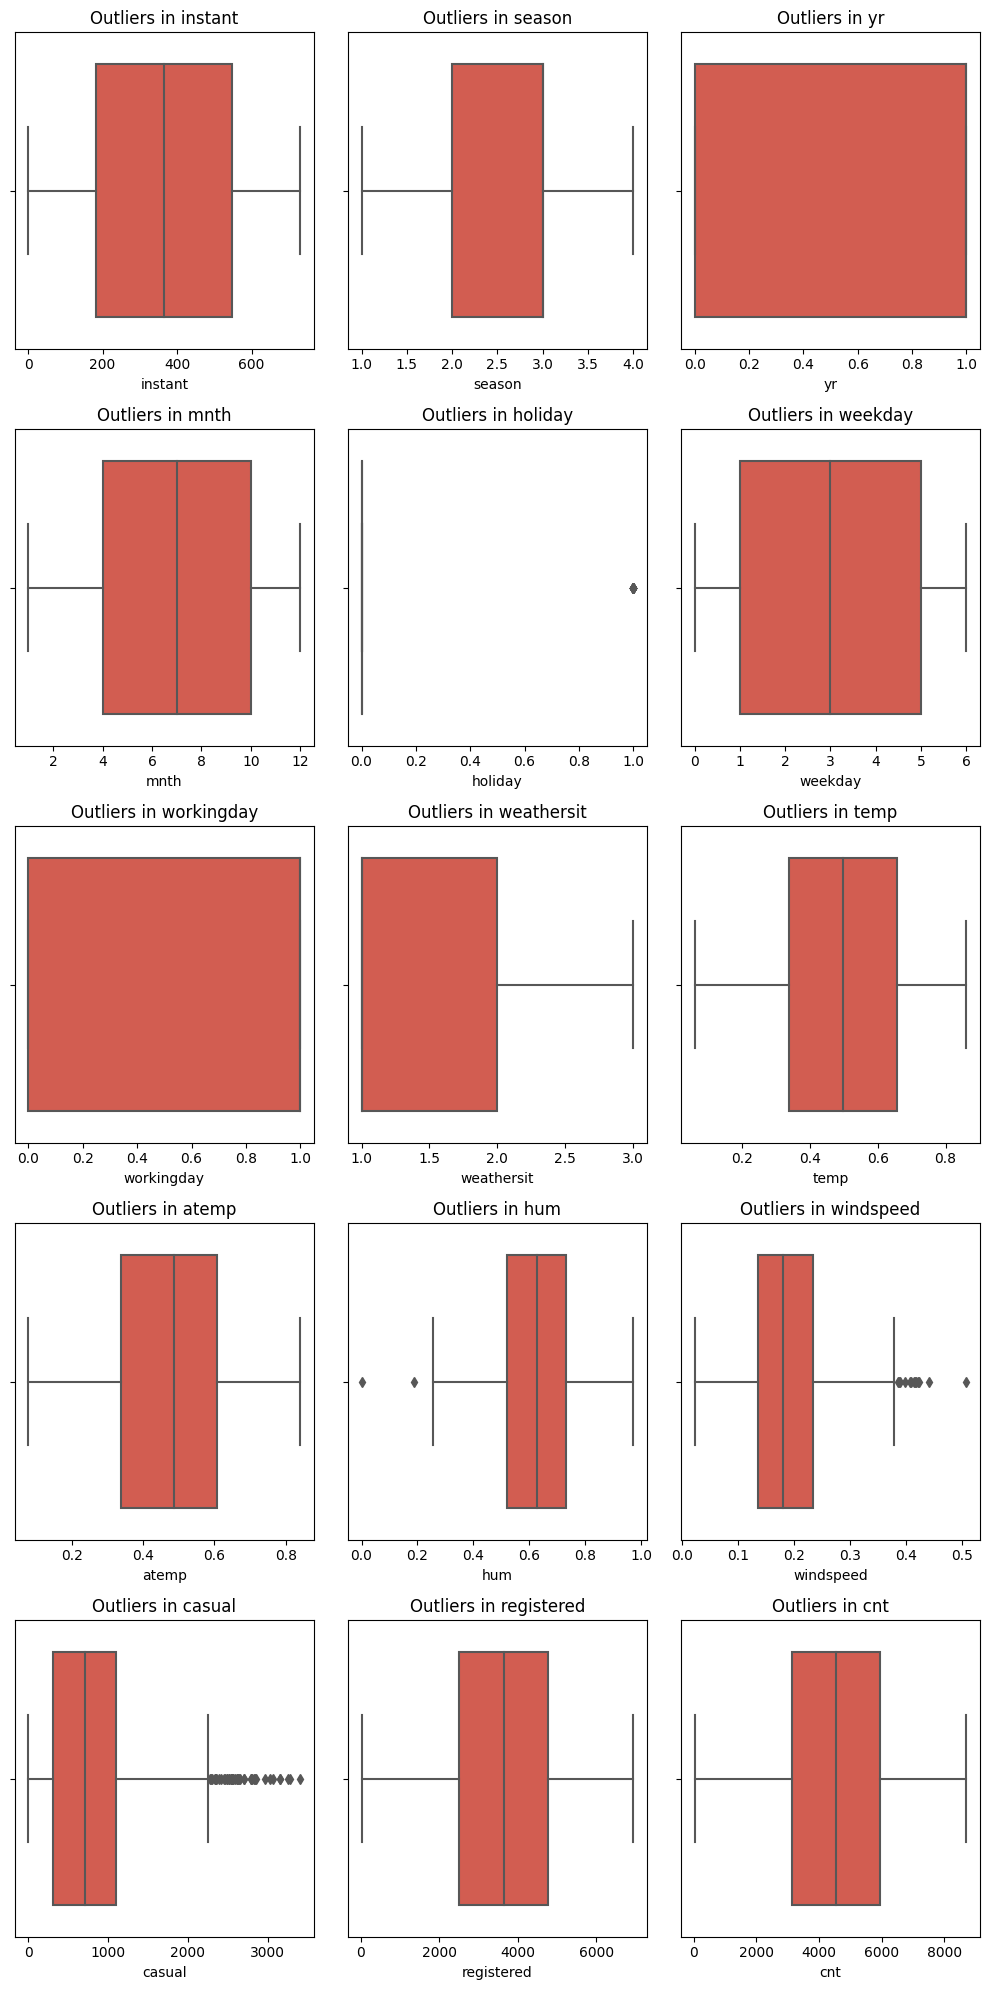

In [12]:
plot_outliers(df_day)

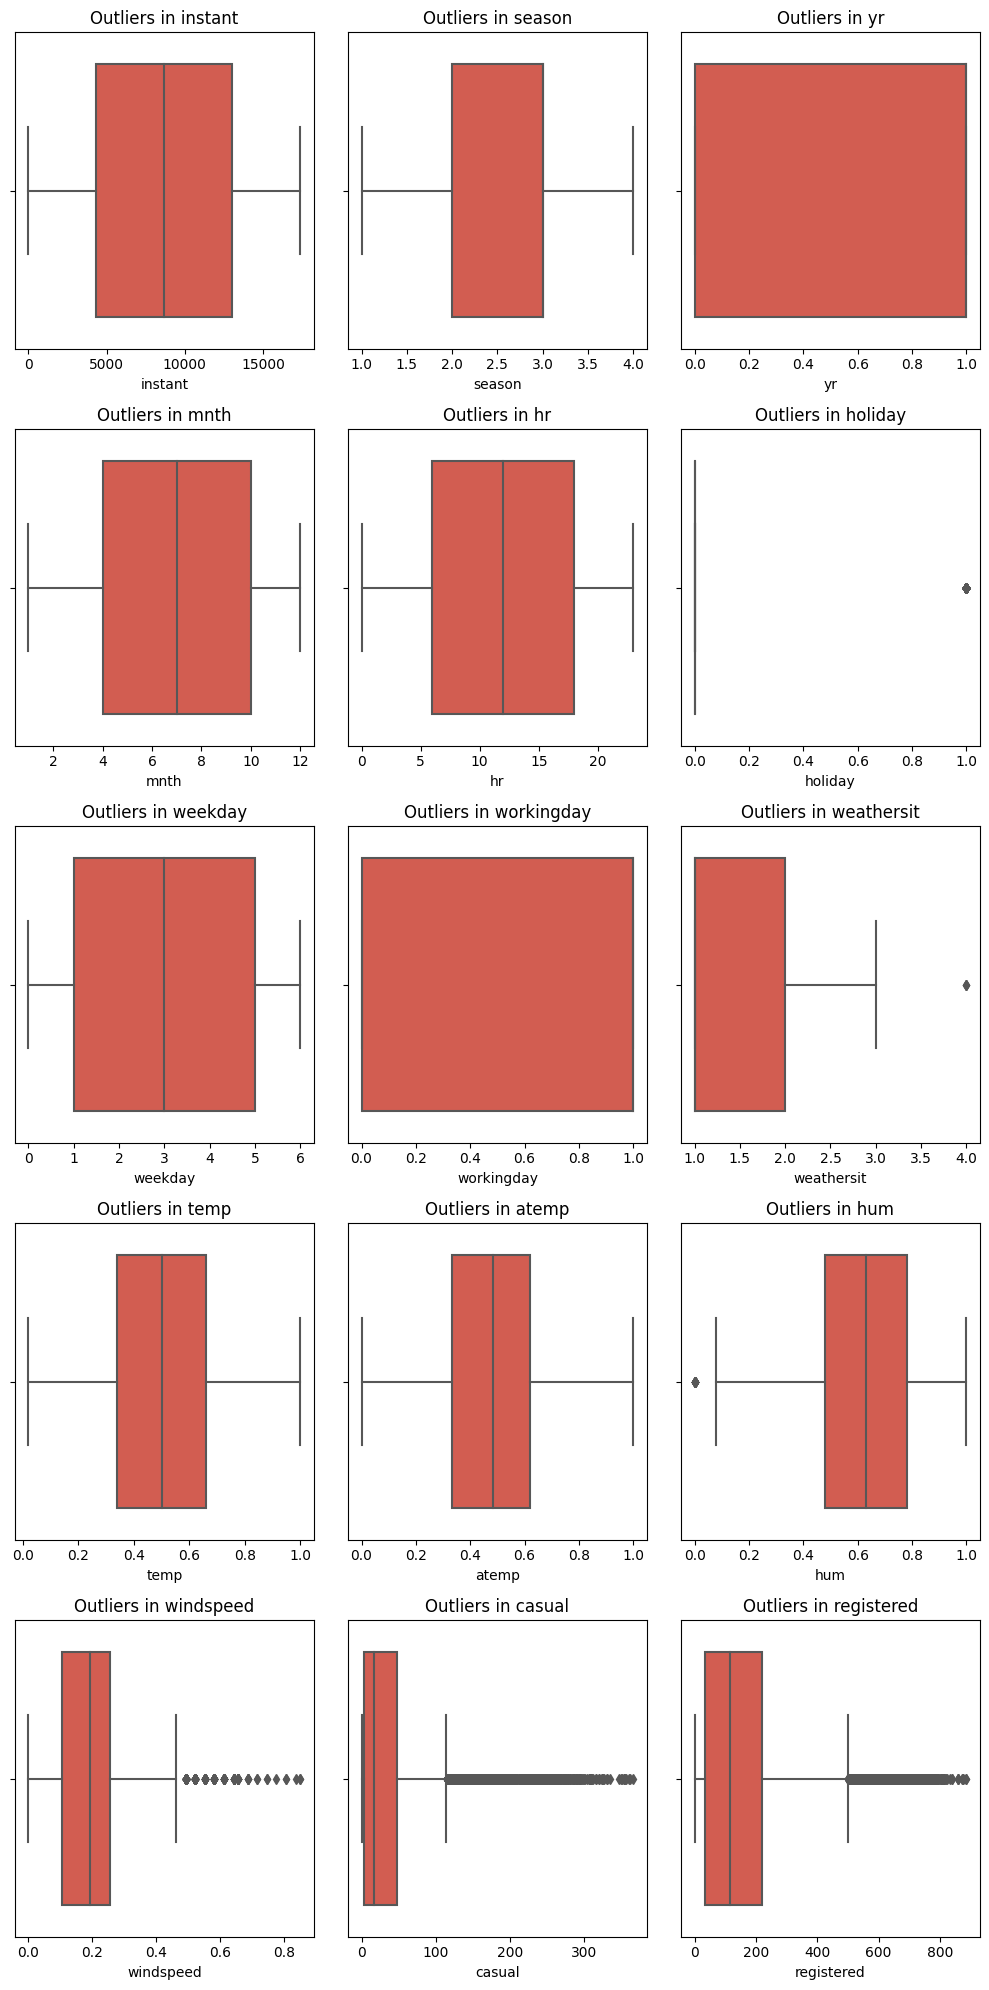

In [13]:
plot_outliers(df_hour)

### Finding Duplicate Values

In [14]:
day_duplicate = df_day[df_day.duplicated()]
day_duplicate

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [15]:
hour_duplicate = df_hour[df_hour.duplicated()]
hour_duplicate

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


## Data Cleaning

In [16]:
# make function to detect Q1, Q3, and IQR
def outlier_detection(datacolumn):
  Q1,Q3 = np.percentile(datacolumn, [25,75])
  IQR = Q3 - Q1
  lowerbound = Q1 - (1.5 * IQR)
  upperbound = Q3 + (1.5 * IQR)
  return lowerbound, upperbound

In [17]:
# Day dataset

#holiday column
lowerbound, upperbound = outlier_detection(df_day.holiday)
df_day.drop(df_day[(df_day.holiday < lowerbound) | (df_day.holiday > upperbound)].index, inplace=True)

# hum column
lowerbound, upperbound = outlier_detection(df_day.hum)
df_day.drop(df_day[(df_day.hum < lowerbound) | (df_day.hum > upperbound)].index, inplace=True)

# windspeed
lowerbound, upperbound = outlier_detection(df_day.windspeed)
df_day.drop(df_day[(df_day.windspeed < lowerbound) | (df_day.windspeed > upperbound)].index, inplace=True)

# casual column
lowerbound, upperbound = outlier_detection(df_day.casual)
df_day.drop(df_day[(df_day.casual < lowerbound) | (df_day.casual > upperbound)].index, inplace=True)

In [18]:
# Hour Dataset

# holiday column
lowerbound, upperbound = outlier_detection(df_hour.holiday)
df_hour.drop(df_hour[(df_hour.holiday < lowerbound) | (df_hour.holiday > upperbound)].index, inplace=True)

# wheatersit column
lowerbound, upperbound = outlier_detection(df_hour.weathersit)
df_hour.drop(df_hour[(df_hour.weathersit < lowerbound) | (df_hour.weathersit > upperbound)].index, inplace=True)

# hum column
lowerbound, upperbound = outlier_detection(df_hour.hum)
df_hour.drop(df_hour[(df_hour.hum < lowerbound) | (df_hour.hum > upperbound)].index, inplace=True)

# windspeed column
lowerbound, upperbound = outlier_detection(df_hour.windspeed)
df_hour.drop(df_hour[(df_hour.windspeed < lowerbound) | (df_hour.windspeed > upperbound)].index, inplace=True)

# casual column
lowerbound, upperbound = outlier_detection(df_hour.casual)
df_hour.drop(df_hour[(df_hour.casual < lowerbound) | (df_hour.casual > upperbound)].index, inplace=True)

# registered
lowerbound, upperbound = outlier_detection(df_hour.registered)
df_hour.drop(df_hour[(df_hour.registered < lowerbound) | (df_hour.registered > upperbound)].index, inplace=True)

# EDA

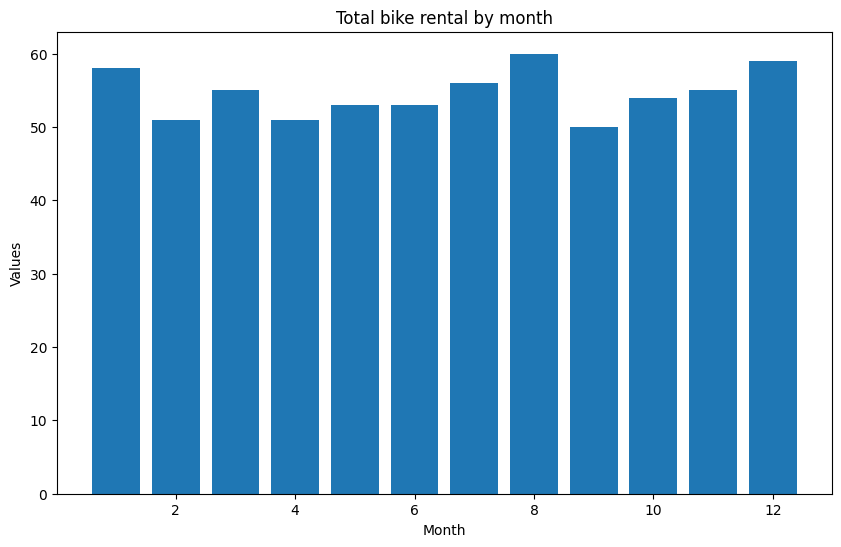

In [30]:
month_counts = df_day['mnth'].value_counts()
sorted_months = month_counts.index.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(sorted_months, month_counts[sorted_months])

plt.title('Total bike rental by month')
plt.xlabel('Month')
plt.ylabel('Values')

plt.show()

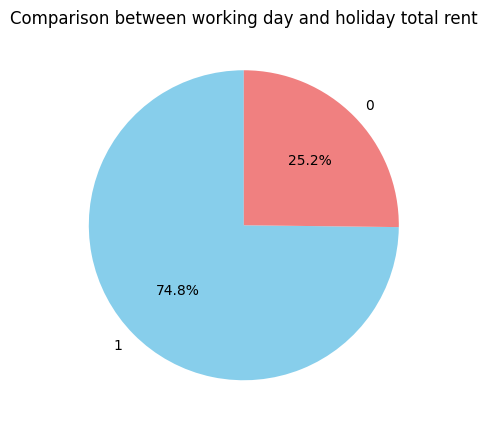

In [28]:

# Count the occurrences of working days and weekends
weekend_counts = df_day['workingday'].value_counts()

# Create a pie chart
plt.figure(figsize=(5, 7))
plt.pie(weekend_counts, labels=weekend_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)

# Set plot title
plt.title('Comparison between working day and holiday total rent')

# Display the plot
plt.show()

> Chart legend
 - 1: Weekend and Holiday
 - 2: Working Day

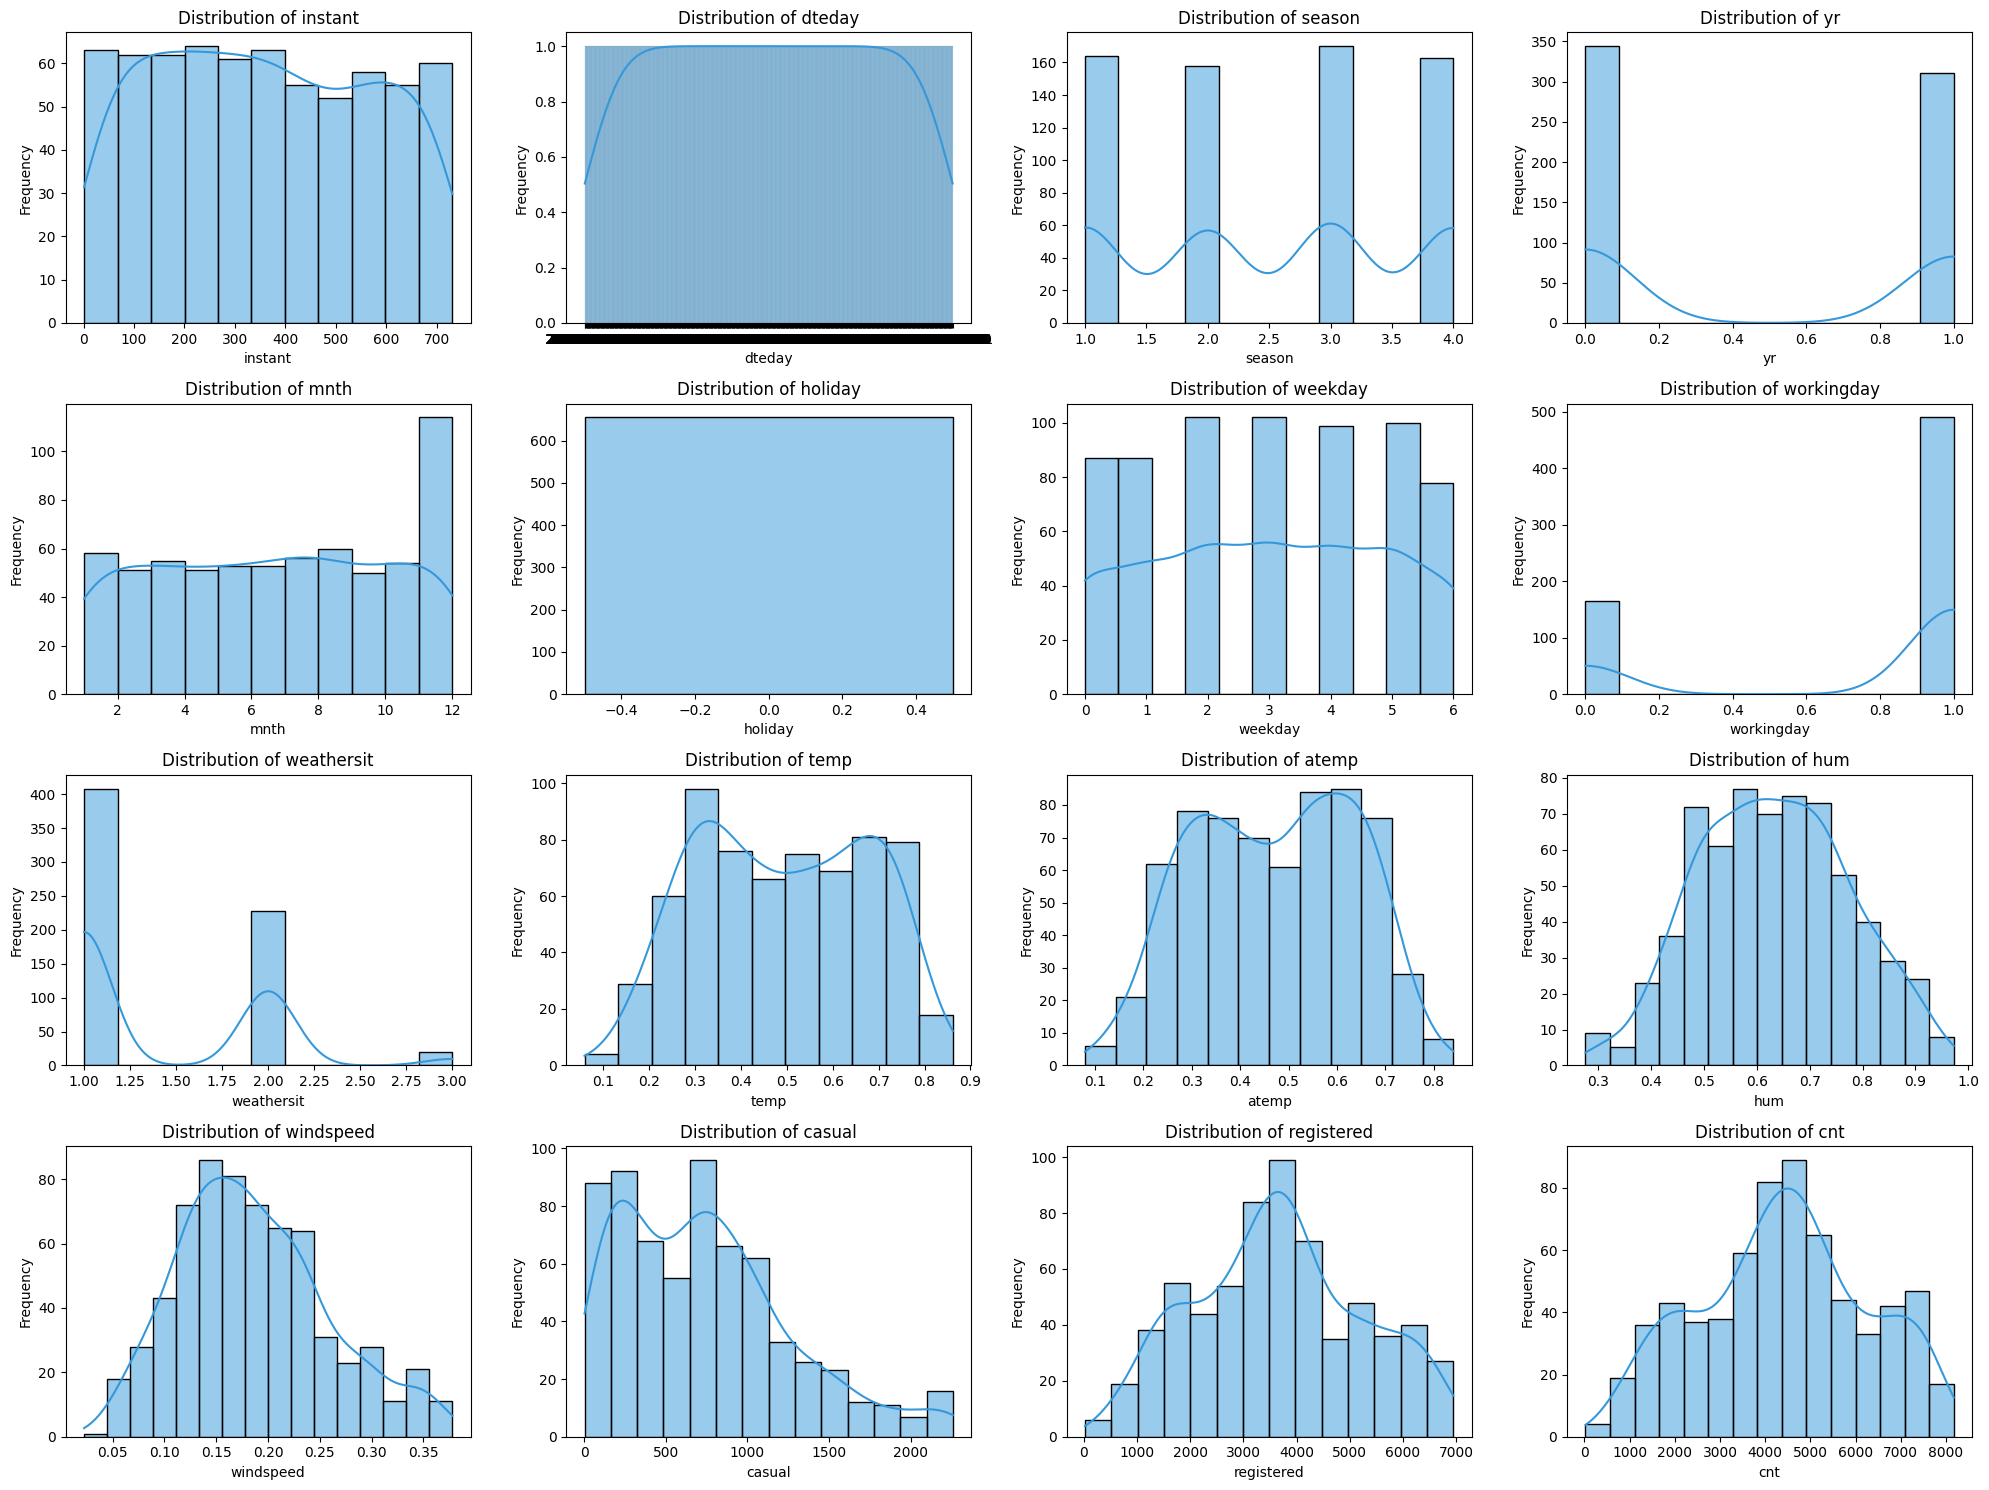

In [21]:
# Data Distribution in Day Dataset
plt.figure(figsize=(20, 15))

for i, column in enumerate(df_day.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_day[column], kde=True, color='#3498db')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Explanatory Data Analysis

## Businees Question 1 and Conclusion

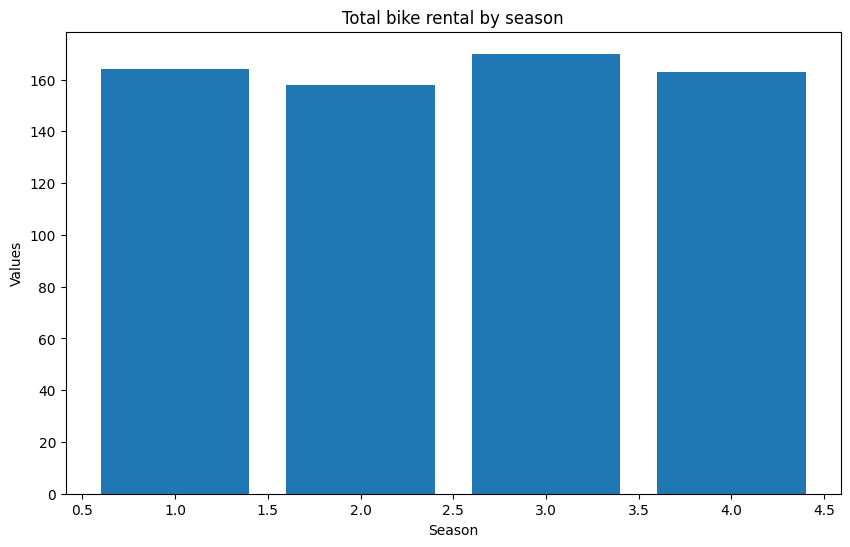

In [32]:
season_counts = df_day['season'].value_counts()

sorted_seasons = season_counts.index.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(sorted_seasons, season_counts[sorted_seasons])

plt.title('Total bike rental by season')
plt.xlabel('Season')
plt.ylabel('Values')

plt.show()

> Chart Legend
- 1: springer
- 2: summer
- 3: fall
- 4: winter

> It can be concluded that the fall season is the season with the highest customer interest in bike rentals

## Business Question 2 and Conclusion

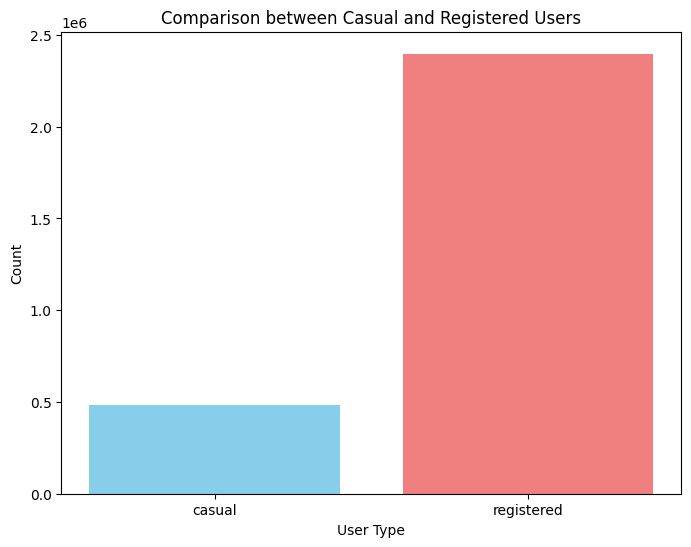

In [33]:
casual_count = df_day['casual'].sum()
registered_count = df_day['registered'].sum()


user_types = ['casual', 'registered']
user_counts = [casual_count, registered_count]

plt.figure(figsize=(8, 6))
plt.bar(user_types, user_counts, color=['skyblue', 'lightcoral'])

plt.title('Comparison between Casual and Registered Users')
plt.xlabel('User Type')
plt.ylabel('Count')

plt.show()

> It can be concluded that customers who have registered are more likely to rent bikes